<h1>Table of Contents<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Reconocimiento-de-prendas-(Fashion-MNIST-dataset)-con-keras/tensorflow" data-toc-modified-id="Reconocimiento-de-prendas-(Fashion-MNIST-dataset)-con-keras/tensorflow-1">Reconocimiento de prendas (Fashion MNIST <em>dataset</em>) con keras/tensorflow</a></span><ul class="toc-item"><li><span><a href="#dataset:-Fashion-MNIST-dataset" data-toc-modified-id="dataset:-Fashion-MNIST-dataset-1.1"><em>dataset</em>: Fashion-MNIST <em>dataset</em></a></span></li><li><span><a href="#0.-Importación-de-librerías" data-toc-modified-id="0.-Importación-de-librerías-1.2">0. Importación de librerías</a></span></li><li><span><a href="#1.-Precarga-del-dataset-(keras)" data-toc-modified-id="1.-Precarga-del-dataset-(keras)-1.3">1. Precarga del <em>dataset</em> (keras)</a></span><ul class="toc-item"><li><ul class="toc-item"><li><span><a href="#--datasets-info:" data-toc-modified-id="--datasets-info:-1.3.0.1">- <em>datasets info</em>:</a></span></li><li><span><a href="#--sample:" data-toc-modified-id="--sample:-1.3.0.2">- <em>sample</em>:</a></span></li></ul></li></ul></li><li><span><a href="#2.-Preprocesado-del-dataset" data-toc-modified-id="2.-Preprocesado-del-dataset-1.4">2. Preprocesado del <em>dataset</em></a></span><ul class="toc-item"><li><span><a href="#2.1.-Normalización-de-las-imágenes" data-toc-modified-id="2.1.-Normalización-de-las-imágenes-1.4.1">2.1. Normalización de las imágenes</a></span></li><li><span><a href="#2.2.-Condificación-one-hot-de-las-etiquetas" data-toc-modified-id="2.2.-Condificación-one-hot-de-las-etiquetas-1.4.2">2.2. Condificación <em>one-hot</em> de las etiquetas</a></span></li></ul></li></ul></li></ul></div>

## Reconocimiento de prendas (Fashion MNIST _dataset_) con keras/tensorflow

### _dataset_: Fashion-MNIST _dataset_
---

Es una colección de imágenes de prendas de vestir proporcionada por [Zalando Research](https://corporate.zalando.com/en/company/research-zalando) usada para el entrenamiento y testeo de sistemas y algoritmos de procesado de imágenes, especialmente en el campo de aprendizaje automático.

<br>Al igual que su laureado y reconocido predecesor (MNIST), **[Fashion-MNIST](https://www.kaggle.com/datasets/zalando-research/fashionmnist)** se compone de imágenes en **escala de grises**, de **28×28** pixeles. En concreto, este _dataset_ está compuesto por **70.000**, repartidas en **10 categorías**, donde **60.000** de ellas son para entrenamiento y las restantes **10.000** para pruebas. Todas las categorías (10) poseen el mismo número de imágenes (7.000), lo que implica que el dataset está **balanceado**.

<br>Las 10 categorías son:

- 0: T-shirt/top (Camiseta o top)

- 1: Trouser/pants (Pantalones)

- 2: Pullover shirt (Pullover)

- 3: Dress (Vestido)

- 4: Coat (Abrigo)

- 5: Sandal (Sandalias)

- 6: Shirt (Camisa)

- 7: Sneaker (Zapatos deportivos)

- 8: Bag (Bolso o maleta)

- 9: Ankle boot (Botines)

<br>En la imagen inferior se observan muestras para cada una de las categorías (cada prenda se halla representada por 3 filas de la foto):

<br><img src="https://raw.githubusercontent.com/zalandoresearch/fashion-mnist/master/doc/img/fashion-mnist-sprite.png"/>

### 0. Importación de librerías
---

In [16]:
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt
import random

# version de tensorflow
print(f"tensorflow version: {tf.__version__}")

# soporte GPU
gpu_list = tf.config.list_physical_devices('GPU')
print(f"tensorflow GPU support: {'yes' if len(gpu_list) else 'no'}")
for i,gpu in enumerate(gpu_list):
    print(f"\t[{i}] - name: {gpu[0]}")

tensorflow version: 2.7.0
tensorflow GPU support: yes
	[0] - name: /physical_device:GPU:0


### 1. Precarga del _dataset_ (keras)
---

In [38]:
# creación de los dataset de entrenamiento y test
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

# lista de categorías
categories = ["t-shirt/top", "trouser", "pullover", "dress", "coat", "sandal", "shirt", "sneaker", "bag", "ankle boot"]

##### - _datasets info_:

In [39]:
# datasets info
print(f"x_train: {x_train.dtype} {x_train.shape}")
print(f"y_train: {y_train.dtype} {y_train.shape}")
print(f"x_test: {x_test.dtype} {x_test.shape}")
print(f"y_test: {y_test.dtype} {y_test.shape}")

x_train: uint8 (60000, 28, 28)
y_train: uint8 (60000,)
x_test: uint8 (10000, 28, 28)
y_test: uint8 (10000,)


##### - _sample_:

In [42]:
def show_image(data, label, labels=None):
    """Muestra la imagen seleccionada del training dataset."""
    # label
    print(f"Label: {label} {'(' + labels[label] + ')' if labels else ''}")

    # data matrix
    print("\nData:")
    for i in range(len(data)):
        for j in range(len(data[0])):
            print(f"{data[i,j]:^5d}", end=" ")
        print()

    # image
    print("\nImage:", end="")
    plt.imshow(data, cmap=plt.cm.binary)

Label: 8 (bag)

Data:
  0     0     0     0     0     0     0     0     0     1     0     0    67    111   102    0     0     2     0     0     0     0     0     0     0     0     0     0   
  0     0     0     0     0     0     0     0     0     0     0    97    71     0    78    116    8     0     2     0     0     0     0     0     0     0     0     0   
  0     0     0     0     0     0     0     0     4     0    58    80     0     0     0    25    117    0     0     0     0     0     0     0     0     0     0     0   
  0     0     0     0     0     0     0     0     0     0    114    0     0     4     6     0    83    37     0     4     1     0     0     0     0     0     0     0   
  0     0     0     0     0     0     0     1     0     9    71     0     2     0     1     0    16    78     0     2     0     0     0     0     0     0     0     0   
  0     0     0     0     0     0     0     4     0    45    66     0     4     0     0     0     0    97     0     0     1     0    

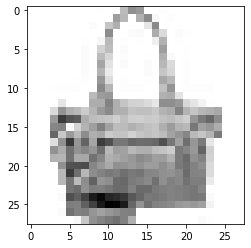

In [43]:
i = random.randint(0, len(x_train)-1)
show_image(x_train[i], y_train[i], categories)

### 2. Preprocesado del _dataset_
---

#### 2.1. Normalización de las imágenes
---

In [45]:
# Normalización de los valores de los píxels de las imágenes al rango [0,1]
xn_train = x_train.astype('float32')/255
xn_test = x_test.astype('float32')/255

print(f"xn_train: {xn_train.dtype} {xn_train.shape}")
print(f"xn_test: {xn_test.dtype} {xn_test.shape}")

xn_train: float32 (60000, 28, 28)
xn_test: float32 (10000, 28, 28)


#### 2.2. Condificación _one-hot_ de las etiquetas
---

In [46]:
from tensorflow.keras.utils import to_categorical

# one-hot encodind a 10-clases
yn_train = to_categorical(y_train, num_classes=10)
yn_test = to_categorical(y_test, num_classes=10)

print(f"yn_train: {yn_train.dtype} {yn_train.shape}")
print(f"yn_test: {yn_test.dtype} {yn_test.shape}")

yn_train: float32 (60000, 10)
yn_test: float32 (10000, 10)


In [48]:
#sample
i = random.randint(0, len(y_train)-1)
print(f"label: {y_train[i]} --> one-hot: {yn_train[i]}")

label: 4 --> one-hot: [0. 0. 0. 0. 1. 0. 0. 0. 0. 0.]
